# Natural Language Processing
## Logistic Regression & Random Forest

## Obtain Stem Words

In [3]:
# Import the pandas library
import pandas as pd

# Load the datafile
df_reviews = pd.read_csv(r'Data/labeledTrainData.tsv', sep='\t')

# Validate the data loaded correctly
df_reviews.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [2]:
#import regular expressions library
import re

#import nltk
import nltk
#import stopwords from NLTK
from nltk.corpus import stopwords
#import word tokenizer from NLTK
from nltk.tokenize import word_tokenize

#import sklearn
import sklearn
#import word count vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
#import tf-idf vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
#get a data frame with reviews and sentiments only
df_reviews_preprocessed = pd.DataFrame(df_reviews[['sentiment','review']])
df_reviews_preprocessed.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
#1) and 2) Convert text to lowercase and romove punctuation/special characters
#define a function to clean the text
def clean_text(text):
    """
    Remove punctuations and special characters, makes lower case
    Args: text 
    Output: text
    """    
    text=text.lower() #makes text lowercase
    text=re.sub('\\d|\\W+|_',' ',text) #removes extra white space
    text=re.sub('[^a-zA-Z0-9]'," ", text) #removes any non-alphanumeric characters
    
    return text

In [6]:
#3) Remove stop words (and tokenize)
def tokenize_and_remove_stop_words(txt):
    """
    takes in a sentence, tokenizes the words into a list,
    and then removes stop words from the tokenized list
    """
    #import the nltk package for tokenizing and removing stop words
    import nltk
    from nltk.tokenize import word_tokenize
    #Note: You may have to run this next commmand to download the NLTK 'punkt' library for the first time
    #nltk.download('punkt')
    from nltk.corpus import stopwords
    #Note: You may need to run this next command to download stopwords for the first time
    #nltk.download('stopwords')
    stop_words = stopwords.words('english')
    
    txt_token = word_tokenize(txt)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    
    return txt_no_stopwords

In [7]:
#4) Apply NLTK's PorterStemmer
#define a function to stem the words
def stem_text(word_list):
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    
    return [porter.stem(word) for word in word_list]

In [10]:
#create new columns in the data frame for each preprocessing step
#apply text cleaning function
df_reviews_preprocessed['review_clean'] = df_reviews_preprocessed['review'].apply(clean_text)
#aplpy tokenizing/removing stop words function
df_reviews_preprocessed['review_tokenized'] = df_reviews_preprocessed['review_clean'].apply(tokenize_and_remove_stop_words)
#apply PorterStemmer function
df_reviews_preprocessed['review_stemmed'] = df_reviews_preprocessed['review_tokenized'].apply(stem_text)
#put the text back together (untokenize)
df_reviews_preprocessed['review_final'] = df_reviews_preprocessed['review_stemmed'].apply(lambda text: ' '.join(text))
#view the pre-processed text
print(df_reviews_preprocessed.shape)
df_reviews_preprocessed.head()

(25000, 6)


,sentiment,review,review_clean,review_tokenized,review_stemmed,review_final
0,1,With all this stuff going down at the moment w...,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ...",stuff go moment mj start listen music watch od...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,0,The film starts with a manager (Nicholas Bell)...,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,0,It must be assumed that those who praised this...,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi...",superbl trashi wondrous unpretenti exploit hoo...


# 2. Split this into a training and test set

In [12]:
# Import library
from sklearn.model_selection import train_test_split

x = df_reviews_preprocessed['review_final']
y = df_reviews_preprocessed['sentiment']

# Create training & test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# 3. Fit an apply the tf-idf vectorization to the training set

In [15]:
# Define a function to get the tf-idf
tfidf = TfidfVectorizer()
tfidf_matrix_train = tfidf.fit_transform(x_train)

# Check the shape to validate tf-idf vectorization
tfidf_matrix_train.shape

(20000, 45297)

# 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (why?).

In [16]:
# Apply the tf-idf vectorization
tfidf_matrix_test = tfidf.transform(x_test)

# Check the shape to validate
tfidf_matrix_test.shape

(5000, 45297)

We do not want to fit the tf-idf vectorization to the test set. Doing so would cause information to leak from the test set into our model.

# 5. Train a logistic regression using the training data.

In [29]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
logistic_regression = LogisticRegression(random_state=0)

# Train model and make predictions
y_test_pred = logistic_regression.fit(tfidf_matrix_train, y_train).predict(tfidf_matrix_test)

# 6. Find the model accuracy on test set.

In [40]:
# Load libraries
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_score(y_test, y_test_pred)

0.8844

The accuracy is 88.4%

# 7. Create a confusion matrix for the test set predictions.

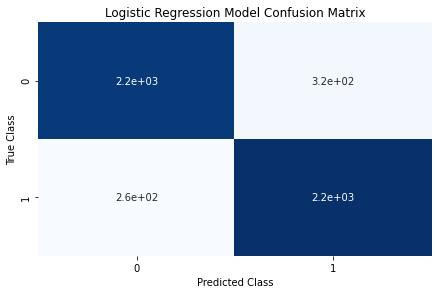

In [36]:
# Load libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
matrix = confusion_matrix(y_test, y_test_pred)

# Create pandas dataframe
df = pd.DataFrame(matrix)

# Create heatmap
sns.heatmap(df, annot=True, cbar=None, cmap="Blues")
plt.title("Logistic Regression Model Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# 8. Get the precision, recall, and F1-score for the test set predictions.

In [47]:
# Load libraries
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
p = "{:.0%}".format(precision_score(y_test, y_test_pred))

# Calculate Recall
r = "{:.0%}".format(recall_score(y_test, y_test_pred))

# Calculate F1-score
f1 = "{:.0%}".format(f1_score(y_test, y_test_pred))

# Print results
print("Precision:",p)
print("Recall:",r)
print("F1-score:",f1)

Precision: 88%
Recall: 90%
F1-score: 89%


# 9. Create a ROC curve for the test set.

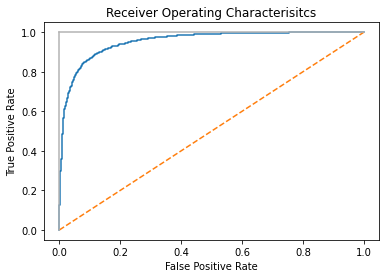

In [55]:
# Load libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
target_probabilities = logistic_regression.predict_proba(tfidf_matrix_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characterisitcs")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


# 10. Repeat steps (5) - (9) for a Random Forest model

## 10.5. Train a random forest using the training data

In [57]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model & predict
rf_model_pred = randomforest.fit(tfidf_matrix_train, y_train).predict(tfidf_matrix_test)

## 10.6. Find the model accuracy on test set.

In [58]:
# Calculate accuracy
accuracy_score(y_test, rf_model_pred)

0.844

The model
s accuracy is 84.4%

## 10.7. Create a confusion matrix for the test set predictions.

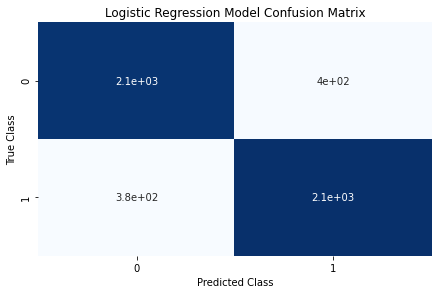

In [59]:
# Create confusion matrix
matrix_rf = confusion_matrix(y_test, rf_model_pred)

# Create pandas dataframe
df_rf = pd.DataFrame(matrix_rf)

# Create heatmap
sns.heatmap(df_rf, annot=True, cbar=None, cmap="Blues")
plt.title("Logistic Regression Model Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## 10.8. Get the precision, recall, and F1-score for the test set predictions.

In [60]:
# Calculate Precision
p_rf = "{:.0%}".format(precision_score(y_test, rf_model_pred))

# Calculate Recall
r_rf = "{:.0%}".format(recall_score(y_test, rf_model_pred))

# Calculate F1-score
f1_rf = "{:.0%}".format(f1_score(y_test, rf_model_pred))

# Print results
print("Precision:",p_rf)
print("Recall:",r_rf)
print("F1-score:",f1_rf)

Precision: 84%
Recall: 85%
F1-score: 84%


## 10.9. Create a ROC curve for the test set.

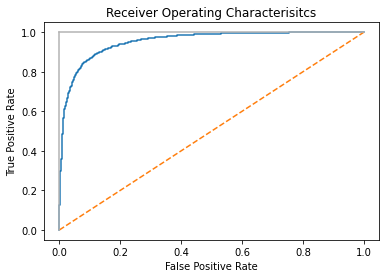

In [61]:
# Get predicted probabilities
target_probabilities_rf = randomforest.predict_proba(tfidf_matrix_test)[:,1]

# Create true and false positive rates
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characterisitcs")
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()